In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

54.03392149720801 -58.05005212856203
79.25269266059121 54.73220964700715
-57.69737489911114 154.35553446496436
84.8291167857929 -167.80331923385455
63.374468777024134 -71.71720136592211
46.577352489046405 -176.3535425444466
8.137584114827973 6.46083637468729
-22.46272376649833 -179.1901854929426
63.1027706694922 73.71079239195038
65.40638155322924 -5.005875299020886
82.69415447459826 113.27680133110135
71.16875765045461 -132.19661383215418
3.9814303879867055 40.94488046930556
65.95002280077387 -38.69029755758527
-28.775517872208695 7.902533284796249
6.916468259723743 67.80096743339024
40.38786776693195 74.83800777480582
89.63123460374658 82.90272631977365
14.31834610468455 137.54390014427548
64.42260474054004 74.64793245951765
-74.47639377778617 21.864656564114597
23.684857528608703 159.12050025403244
57.56822015997136 -175.52075710040737
86.33200794238735 74.88277190749767
39.08340228249858 91.96176230594943
34.42316970091345 -176.740884779476
-31.38510586846099 47.040992638080894
42.

28.903040938893298 144.71944794662681
78.24610919365114 -104.63103544805585
-87.44277003813428 -157.26393552399568
11.274974137141427 106.92917990470266
-57.268608947227676 11.562059986356928
7.43325154742557 76.4375455364684
11.342638291737686 107.85081476579546
-10.414861529115711 1.5674373532296215
42.05596549275015 160.27624685495215
27.935279115332534 -37.00511003643487
-82.95236415069392 -152.20589438549948
-38.3473529994095 60.35218499621095
-10.30908154590665 49.273970373547286
-63.057601561566486 -29.95705925797583
24.30138931599015 0.907308023937901
-48.220917135039066 -139.92384856491276
22.278236698278477 -77.92268581942075
81.82977163265815 -130.95111516464328
63.069093135810135 128.7251343592485
2.015837082401646 -37.730376141148525
-82.35618775685195 -9.38296839300719
76.74534095008153 -126.07601869464
31.989028131687007 -118.83624006823175
-70.17753470331934 159.91640743863798
72.50188783871909 -11.543035391735458
-14.930720727613163 109.72882587921066
-88.4011078859388

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | saint-augustin
Processing Record 2 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 13 | hobart
Processing Record 4 of Set 13 | barrow
Processing Record 5 of Set 13 | iqaluit
Processing Record 6 of Set 13 | provideniya
Processing Record 7 of Set 13 | lokoja
Processing Record 8 of Set 13 | vaini
Processing Record 9 of Set 13 | muravlenko
Processing Record 10 of Set 13 | klaksvik
Processing Record 11 of Set 13 | saskylakh
Processing Record 12 of Set 13 | tuktoyaktuk
Processing Record 13 of Set 13 | mandera
Processing Record 14 of Set 13 | tasiilaq
Processing Record 15 of Set 13 | luderitz
Processing Record 16 of Set 13 | kulhudhuffushi
Processing Record 17 of Set 13 | at-bashi
Processing Record 18 of Set 13 | dikson
Processing Record 19 of Set 13 | airai
Processing Record 20 of Set 13 | bredasdorp
Processing Record 21 of Set 13 | hasaki
Processing Record 22 of Set 1

Processing Record 35 of Set 16 | strelka
Processing Record 36 of Set 16 | lobva
Processing Record 37 of Set 16 | harper
Processing Record 38 of Set 16 | ancud
Processing Record 39 of Set 16 | lano
Processing Record 40 of Set 16 | tabuk
Processing Record 41 of Set 16 | lasa
Processing Record 42 of Set 16 | lazurne
Processing Record 43 of Set 16 | ust-kamchatsk
City not found. Skipping...
Processing Record 44 of Set 16 | imeni poliny osipenko
Processing Record 45 of Set 16 | yantal
Processing Record 46 of Set 16 | champerico
Processing Record 47 of Set 16 | souillac
Processing Record 48 of Set 16 | cam ranh
Processing Record 49 of Set 16 | grimshaw
Processing Record 50 of Set 16 | port lincoln
Processing Record 1 of Set 17 | santiago
Processing Record 2 of Set 17 | carutapera
Processing Record 3 of Set 17 | grindavik
Processing Record 4 of Set 17 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 17 | allende
Processing Record 6 of Set 17 | sorong
Processing Record

Processing Record 20 of Set 20 | cidreira
Processing Record 21 of Set 20 | koulamoutou
Processing Record 22 of Set 20 | ruatoria
City not found. Skipping...
Processing Record 23 of Set 20 | bay roberts
Processing Record 24 of Set 20 | la ronge
Processing Record 25 of Set 20 | tabuan
Processing Record 26 of Set 20 | skibotn
Processing Record 27 of Set 20 | armacao dos buzios
City not found. Skipping...
Processing Record 28 of Set 20 | estelle
Processing Record 29 of Set 20 | mont-dore
Processing Record 30 of Set 20 | lorengau
Processing Record 31 of Set 20 | hambantota
Processing Record 32 of Set 20 | pietarsaari
Processing Record 33 of Set 20 | nishihara
Processing Record 34 of Set 20 | rockwall
Processing Record 35 of Set 20 | cherskiy
Processing Record 36 of Set 20 | jasper
Processing Record 37 of Set 20 | lavrentiya
Processing Record 38 of Set 20 | mubende
Processing Record 39 of Set 20 | chokurdakh
Processing Record 40 of Set 20 | mount gambier
Processing Record 41 of Set 20 | hede

Processing Record 5 of Set 24 | hanna
Processing Record 6 of Set 24 | novoagansk
Processing Record 7 of Set 24 | padang
Processing Record 8 of Set 24 | cabo san lucas
Processing Record 9 of Set 24 | bealanana
Processing Record 10 of Set 24 | kleck
City not found. Skipping...
Processing Record 11 of Set 24 | temaraia
City not found. Skipping...
Processing Record 12 of Set 24 | huaihua
Processing Record 13 of Set 24 | guerrero negro
Processing Record 14 of Set 24 | erice
Processing Record 15 of Set 24 | araripe
Processing Record 16 of Set 24 | cao bang
Processing Record 17 of Set 24 | azimur
City not found. Skipping...
Processing Record 18 of Set 24 | mto wa mbu
Processing Record 19 of Set 24 | kenai
Processing Record 20 of Set 24 | pitimbu
Processing Record 21 of Set 24 | olden
Processing Record 22 of Set 24 | valleyview
Processing Record 23 of Set 24 | kirakira
Processing Record 24 of Set 24 | kavarskas
Processing Record 25 of Set 24 | omboue
Processing Record 26 of Set 24 | isabela
Pr

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Augustin,51.2260,-58.6502,50.47,64,59,8.52,CA,2022-05-21 00:00:55
1,Hobart,-42.8794,147.3294,49.26,96,75,12.66,AU,2022-05-20 23:58:05
2,Barrow,71.2906,-156.7887,32.02,93,100,12.66,US,2022-05-21 00:00:55
3,Iqaluit,63.7506,-68.5145,29.70,86,94,8.99,CA,2022-05-21 00:00:56
4,Provideniya,64.3833,-173.3000,48.60,56,36,10.00,RU,2022-05-21 00:00:56
5,Lokoja,7.8024,6.7430,78.75,80,96,6.08,NG,2022-05-21 00:00:56
6,Vaini,-21.2000,-175.2000,76.75,70,97,11.12,TO,2022-05-21 00:00:56
7,Muravlenko,63.7898,74.5230,38.62,74,82,10.22,RU,2022-05-21 00:00:57
8,Klaksvik,62.2266,-6.5890,49.12,97,100,16.35,FO,2022-05-21 00:00:57
9,Saskylakh,71.9167,114.0833,32.54,88,100,5.73,RU,2022-05-21 00:00:57


In [19]:
#change the column order

new_column_order =[ "City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Augustin,CA,2022-05-21 00:00:55,51.2260,-58.6502,50.47,64,59,8.52
1,Hobart,AU,2022-05-20 23:58:05,-42.8794,147.3294,49.26,96,75,12.66
2,Barrow,US,2022-05-21 00:00:55,71.2906,-156.7887,32.02,93,100,12.66
3,Iqaluit,CA,2022-05-21 00:00:56,63.7506,-68.5145,29.70,86,94,8.99
4,Provideniya,RU,2022-05-21 00:00:56,64.3833,-173.3000,48.60,56,36,10.00
5,Lokoja,NG,2022-05-21 00:00:56,7.8024,6.7430,78.75,80,96,6.08
6,Vaini,TO,2022-05-21 00:00:56,-21.2000,-175.2000,76.75,70,97,11.12
7,Muravlenko,RU,2022-05-21 00:00:57,63.7898,74.5230,38.62,74,82,10.22
8,Klaksvik,FO,2022-05-21 00:00:57,62.2266,-6.5890,49.12,97,100,16.35
9,Saskylakh,RU,2022-05-21 00:00:57,71.9167,114.0833,32.54,88,100,5.73


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


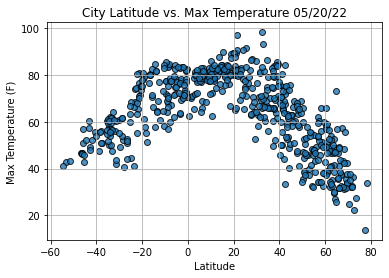

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

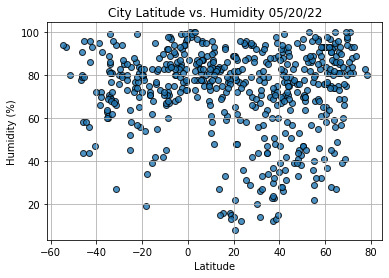

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


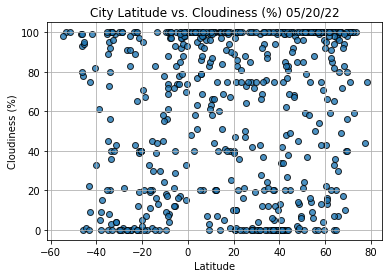

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

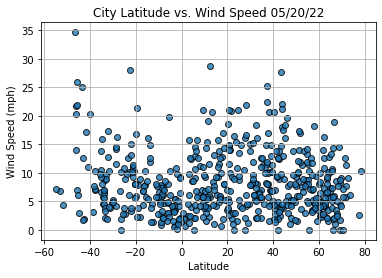

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()